# Sumário

* [1. - Cenário](#1.-Cenário)

    - [1.1 - Dados Utilizados](#1.1-Dados-Utilizados)
<br></br>
* [2. - Leitura e exploração inicial dos dados](#2.-Leitura-e-exploração-inicial-dos-dados)

    - [2.1 Base de dados de consumidores](#2.1-Base-de-dados-de-consumidores)

    - [2.2 Base de dados de geolocalização](#2.2-Base-de-dados-de-geolocalização)

    - [2.3 Base de dados de produtos](#2.3-Base-de-dados-de-produtos)

    - [2.4 Base de dados de pedidos](#2.4-Base-de-dados-de-pedidos)

    - [2.5 Base de dados de produtos pedidos](#2.5-Base-de-dados-de-produtos-pedidos)

    - [2.6 Base de dados de pagamentos](#2.6-Base-de-dados-de-pagamentos)

    - [2.7 Base de dados de reviews](#2.7-Base-de-dados-de-reviews)

    - [2.8 Base de dados de vendedores](#2.8-Base-de-dados-de-vendedores)
<br></br>
* [3. Visualização dos dados](#3.-Visualização-dos-dados)

    - [3.1 Visualizando dados de tabelas únicas](#3.1-Visualizando-dados-de-tabelas-únicas)

    - [3.2 Visualizando dados de tabelas distintas](#3.2-Visualizando-dados-de-tabelas-distintas)

    - [3.2.1 Vendas mensais](#3.2.1-Vendas-mensais)
<br></br>
* [Conclusões](#Conclusões)

## 1. Cenário

A Olist é uma startup brasileira no setor de e-commerce que concentra vendedores cujos vendem seus produtos nos mais diversos marketplaces (como o Mercado Livre e a Amazon). Ao mesmo tempo ela permite que o consumidor final tenha acesso a esses produtos por meio de uma loja única.

Devido a empresa atuar no setor de e-commerce ela obtém um grande número de dados diariamente, assim a área de negócio da Olist ficou com algumas dúvidas, que esperam ser respondidas através dos dados:

* O preço dos produtos vendidos por diferentes lojistas associados apresentam grandes discrepâncias?
* Podemos dar benefícios a certos lojistas em destaque, ou devemos oferecer a todos o mesmo tratamento?
* Existe diferença no valor do frete praticado em regiões/cidades diferentes? Ou podemos aplicar as mesmas regras de subsídio de frete para qualquer localidade?
* O catálogo de produtos vendidos é abrangente ou tem foco em uma categoria específica? 
* Os produtos vendidos são sazonais?

### 1.1 Dados Utilizados

Os dados utilizados para a análise presente neste notebook estão disponibilizados no <a href=https://github.com/olist/work-at-olist-data>github da Olist</a>. O schema desse banco de dados é o seguinte:

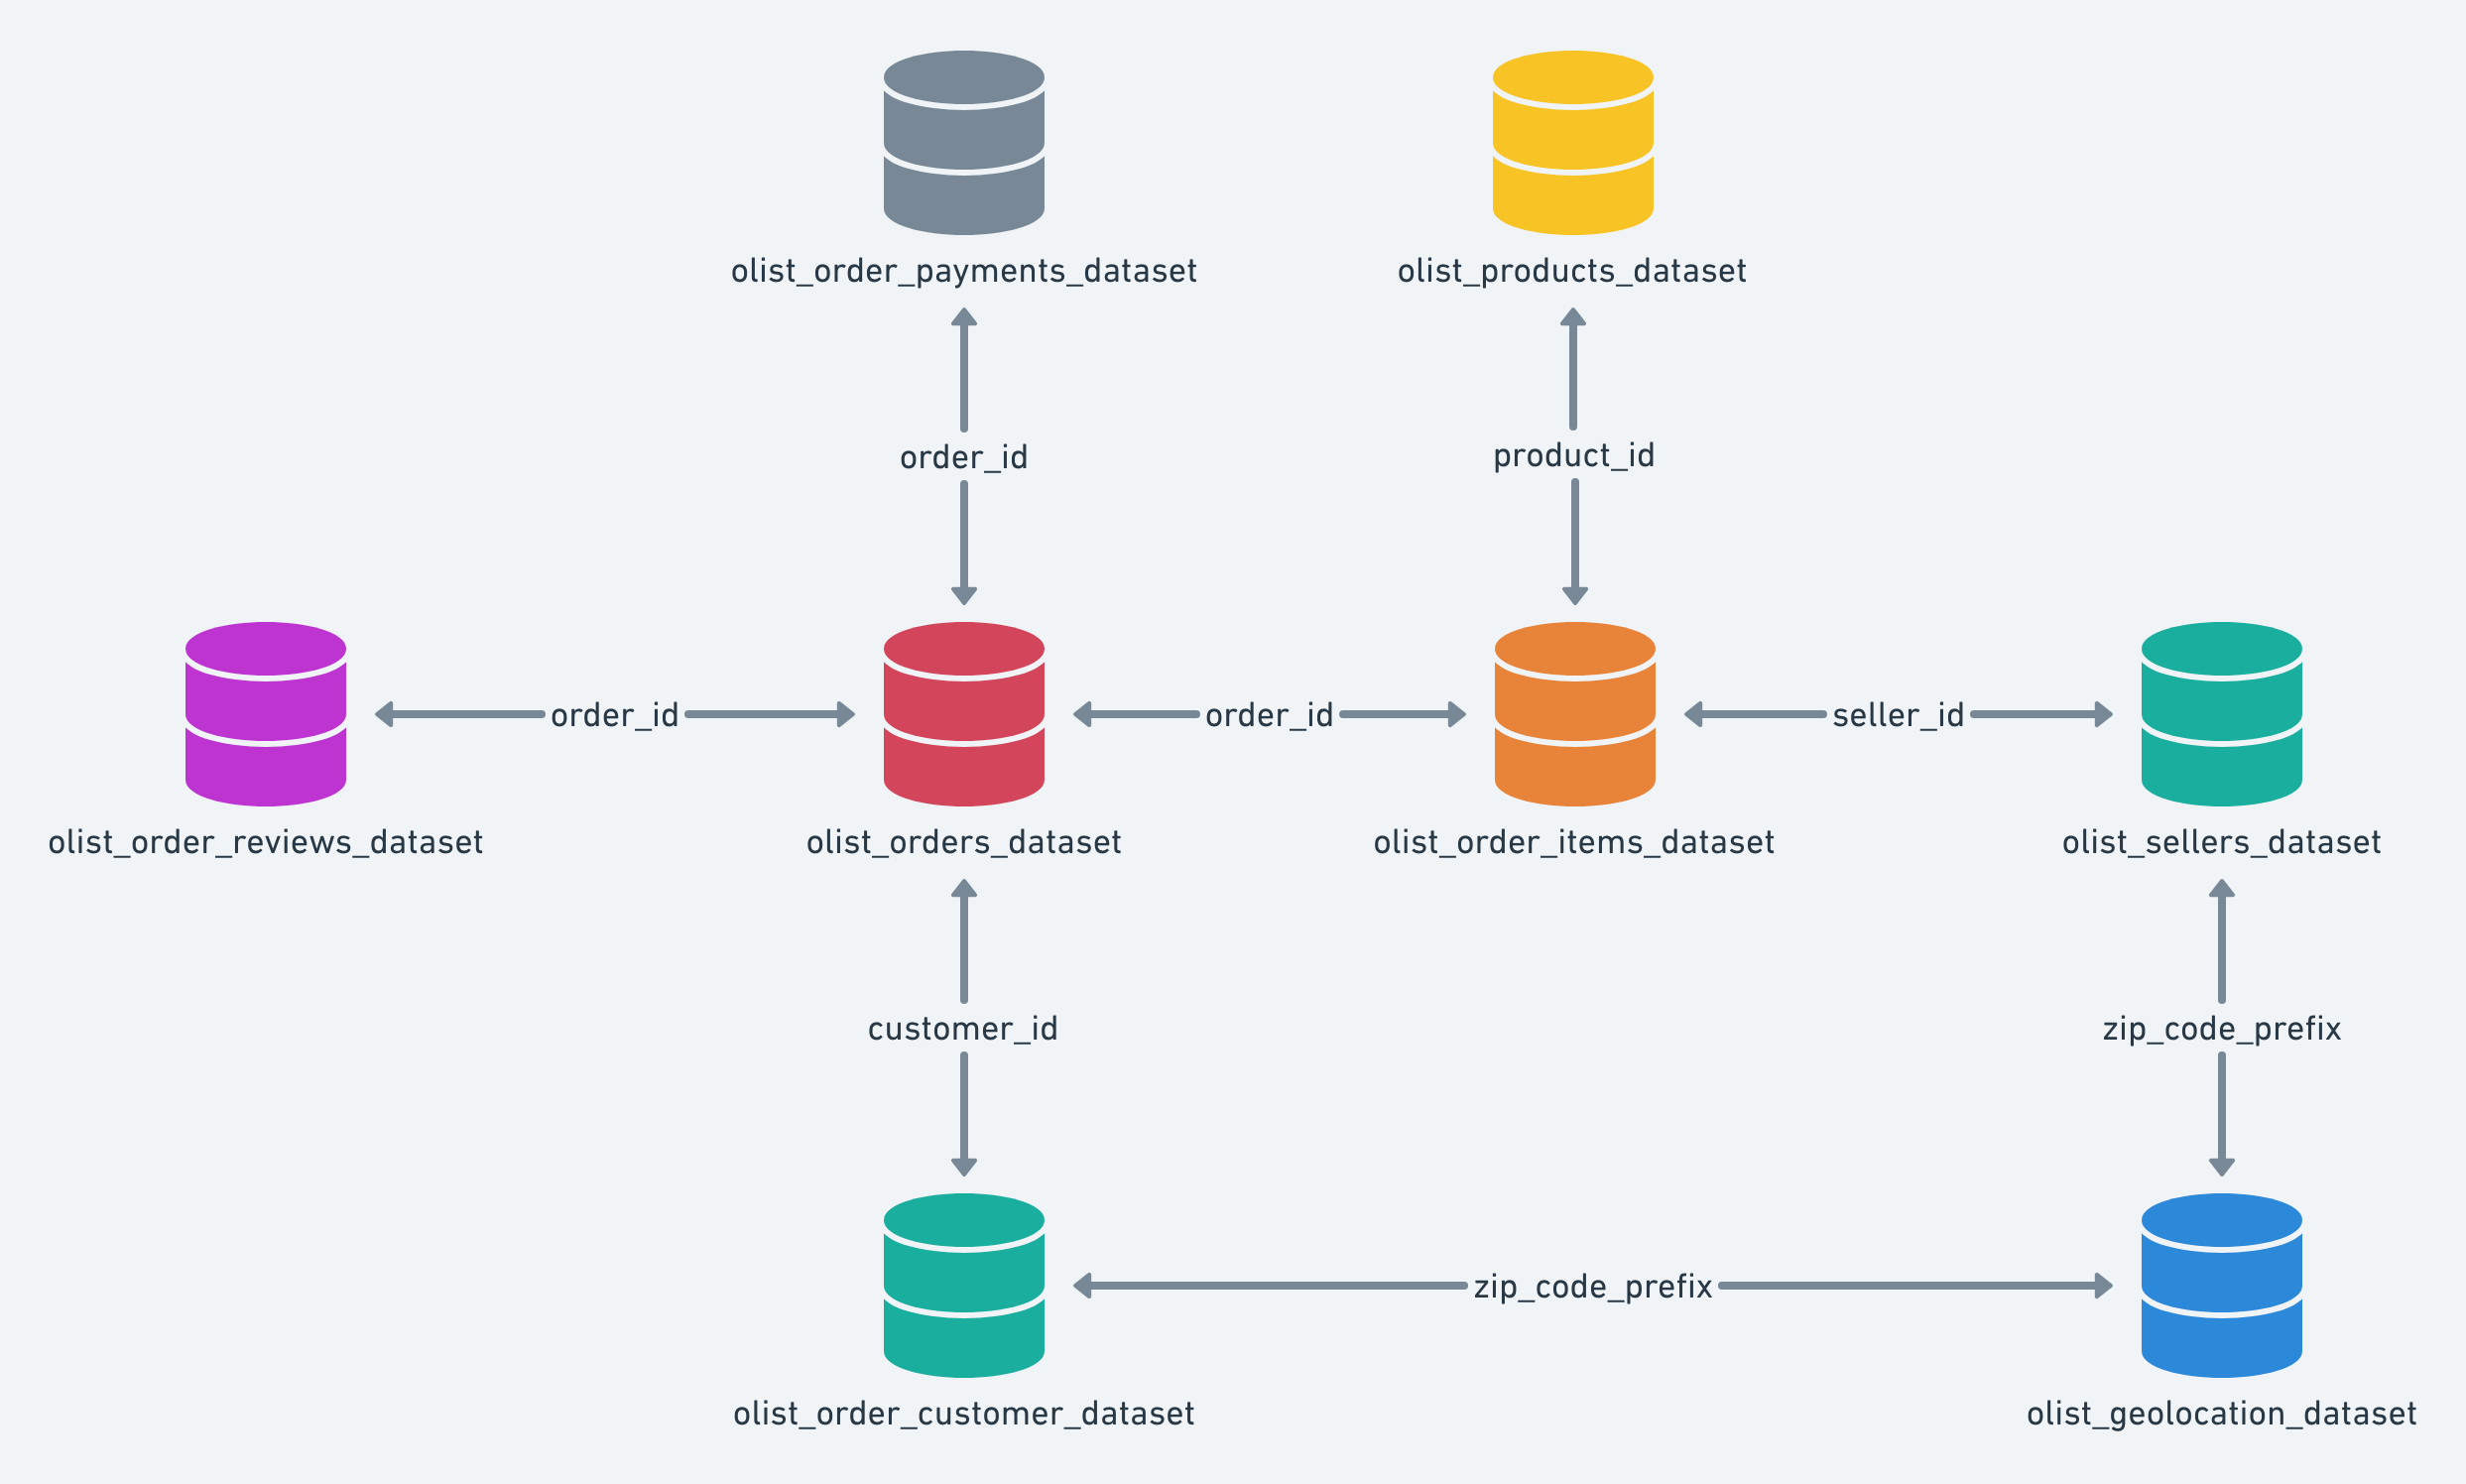

## 2. Leitura e exploração inicial dos dados

**Bibliotecas utilizadas**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Algumas configurações:

In [2]:
sns.set_style("whitegrid")

In [3]:
# Leitura dos dados
path_customer = "datasets/olist_customers_dataset.csv" #Abreviado para CUST
path_geolocation = "datasets/olist_geolocation_dataset.csv" #Abreviado para GEO
path_products = "datasets/olist_products_dataset.csv" #Abreviado para PROD
path_orders = "datasets/olist_orders_dataset.csv" #Abreviado para Ord
path_order_item = "datasets/olist_order_items_dataset.csv" #Abreviado para OrdI
path_order_payments = "datasets/olist_order_payments_dataset.csv" #Abreviado para OrdP
path_order_reviews = "datasets/olist_order_reviews_dataset.csv" #Abreviado para OrdR
path_sellers = "datasets/olist_sellers_dataset.csv" #Abreviado para SELL
path_product_category_name_translation = "datasets/product_category_name_translation.csv" #Abreviado para PCNT

### 2.1 Base de dados de consumidores

O 1º dataset que iremos olhar será o `olist_customers_dataset.csv`.

In [4]:
df_CUST_or = pd.read_csv(path_customer)
df_CUST_or.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


Nessa base de dados temos os seguintes dados:
* customer_id - Representa o ID do cliente;
* customer_unique_id - Representa um ID único do cliente;
* customer_zip_code_prefix - Representa o prefiro do CEP desse cliente;
* customer_city - Representa a cidade na qual o cliente mora;
* customer_state - Representa o estado na qual o cliente mora;

In [5]:
df_CUST_or.info() #Informações acerca do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [6]:
df_CUST_or.isnull().sum() #Busco a existência de valores nulos nesse dataset

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### 2.2 Base de dados de geolocalização

O 2º dataset que iremos olhar será o `olist_geolocation_dataset.csv`.

In [7]:
df_GEO_or = pd.read_csv(path_geolocation)
df_GEO_or.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


Nessa base de dados temos os seguintes dados:
* geolocation_zip_code_prefix - Prefixo do CEP de algum cliente/lojista obtido através de geolocalização;
* geolocation_lat - Latitude do cliente/lojista obtida através de geolocalização;
* geolocation_lng - Longitude do cliente/lojista obtida através de geolocalização;
* geolocation_city - Cidade do cliente/lojista obtida através de geolocalização;
* geolocation_state - Estado do cliente/lojista obtida através de geolocalização.

In [8]:
df_GEO_or.info() #Informações acerca do dataset;

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [9]:
df_GEO_or.isnull().sum() #Busco ver se existem valores nulos nesse dataset;

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### 2.3 Base de dados de produtos

O 3º dataset que iremos olhar será o `olist_products_dataset.csv`.

In [10]:
df_PROD_or = pd.read_csv(path_products)
df_PROD_or.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


Nesse banco de dados teremos:
* product_id - Um ID do produto;
* product_category_name - Categoria na qual esse produto pode ser encontrado;
* product_name_lenght - Tamanho do nome do produto;
* product_description_lenght - Tamanho da descrição do produto;
* product_photos_qty - Número de fotos sobre o produto;
* product_weight_g - Massa do produto, em gramas; 
* product_length_cm - Comprimento do produto, em centímetros;
* product_height_cm - Altura do produto, em centímetros; 
* product_width_cm - Largura do produto, em centímetros;

In [11]:
df_PROD_or.info() #Informações acerca desse dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [12]:
df_PROD_or.isnull().sum() #Busco ver se existem valores nulos nesse dataset.

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Aparentemente temos alguns produtos que não estão categorizados, outros que seu nome não tem nenhum tamanho ou descrição, ao mesmo tempo podemos observar que esses produtos não apresentam nenhuma foto. É interessante que notar que a quantidade de produtos que não apresentam uma categoria é a mesma de produtos que não apresentam nome/descrição/fotos. Possivelmente, são os mesmos produtos.

Além disso, temos dois produtos que não informam o seu peso ou dimensão, talvez possam ser os mesmos ou distintos.

In [13]:
df_PROD_or[(df_PROD_or["product_category_name"].isnull())      & 
           (df_PROD_or["product_name_lenght"].isnull())        &
           (df_PROD_or["product_description_lenght"].isnull()) &
           (df_PROD_or["product_photos_qty"].isnull())] #Observo produtos nulos.

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Fazendo uma pesquisa no dataset, confirmamos a hipótese anterior de que os produtos sem categoria não apresentam nome, descrição ou uma foto acerca do mesmo. 

In [14]:
df_PROD_or[(df_PROD_or["product_length_cm"].isnull())]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ao analisarmos os produtos que não informam suas dimensões, conseguimos ver que os dois produtos de cada categoria são os mesmos. Além disso é interessante notar que um dos produtos não apresenta nenhuma informação sobre si.

### 2.4 Base de dados de pedidos

O 4º dataset que iremos olhar será o `olist_orders_dataset.csv`.

In [15]:
df_Ord_or = pd.read_csv(path_orders)
df_Ord_or.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


Nesse banco de dados teremos:
* order_id - Um ID pro pedido do cliente;
* customer_id - O ID do cliente; 
* order_status - Informações a respeito da entrega ter sido feita ou não;
* order_purchase_timestamp - Horário (Ano-mês-dia hora:minuto:segundo) em que a compra foi feita;
* order_approved_at - Horário em que a compra foi aprovada;
* order_deivered_carrier_date - Horário em que o produto foi enviado;
* order_delivered_customer_date - Horário em que ocorreu a entrega do produto;
* order_estimated_delivery_date - Data estimada para a entrega do produto.

In [16]:
df_Ord_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
df_Ord_or.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Podemos notar que o horário de aprovação, o horário de envio e o horário de entrega de alguns pedidos não foram incluidos no banco de dados.

In [18]:
df_Ord_or[(df_Ord_or["order_approved_at"].isnull())            &
          (df_Ord_or["order_delivered_carrier_date"].isnull()) &
          (df_Ord_or["order_delivered_customer_date"].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Podemos notar que 146 pedidos não apresentam informações a cerca de quando foram aprovados, enviados ou entregues. É interesse notar que o status de cada pedido é de cancelamento, então pode ter ocorrido do pedido ter sido feito mas cancelado antes mesmo dele ser aprovado, o que explicaria a falta de informações.

In [19]:
df_Ord_or[(df_Ord_or["order_approved_at"].isnull())            &
          (df_Ord_or["order_delivered_carrier_date"].isnull()) &
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"] == "canceled")].shape

(141, 8)

Pelo tamanho do dataset obtido, 141 pedidos foram cancelados. Ainda fica a questão de o que ocorreu com os cinco pedidos restantes? 

In [20]:
df_Ord_or["order_status"].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [21]:
df_Ord_or[(df_Ord_or["order_approved_at"].isnull())            &
          (df_Ord_or["order_delivered_carrier_date"].isnull()) &
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"] == "created")].shape

(5, 8)

A ordem a respeito do pedido foi criada, mas nenhuma informação extra a respeito dele foi adicionada. 

In [22]:
df_Ord_or[(df_Ord_or["order_approved_at"].isnull()) & 
          (df_Ord_or["order_delivered_carrier_date"].notnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaN,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31 00:00:00
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaN,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20 00:00:00
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaN,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01 00:00:00
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaN,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27 00:00:00
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaN,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22 00:00:00
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,NaN,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16 00:00:00
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,NaN,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20 00:00:00


Podemos notar também que os outros 14 pedidos cujas informações a respeito de sua aprovação não fora incluidas no sistema foram entregues. 

Somando 141+5+14, temos os 160 pedidos onde o status da aprovação é faltante.

Agora, analisamos os dados que dizem a respeito de quando o pedido foi enviado ao cliente. 

In [23]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaN,NaN,2017-12-05 00:00:00
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaN,NaN,2016-12-09 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


Podemos notar, pelo tamanho do dataset, que as ordens cujas informações a respeito do horário em que foram enviadas e do horário de entrega apresentam 1782 dados. Informaçoes a respeito do horário em que foram enviadas e são nulas são, no total, 1783 dados. Talvez isso possa ter ocorrido devido a algum erro relacionado aos dados da empresa de entrega escolhida.

In [24]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].notnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaN,2017-11-20 19:44:47,2017-11-14 00:00:00


O único dado restante é relacionado a respeito a data de entrega, o que pode ter ocorrido por N motivos, contudo o pedido aparentemente foi entregue.

In [25]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())]["order_status"].unique()

array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

In [26]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"]=="invoiced")].shape

(314, 8)

In [27]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"]=="processing")].shape

(301, 8)

In [28]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"]=="unavailable")].shape

(609, 8)

In [29]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"]=="canceled")].shape

(550, 8)

In [30]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"]=="created")].shape

(5, 8)

In [31]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"]=="approved")].shape

(2, 8)

In [32]:
df_Ord_or[(df_Ord_or["order_delivered_carrier_date"].isnull()) & 
          (df_Ord_or["order_delivered_customer_date"].isnull())&
          (df_Ord_or["order_status"]=="delivered")].shape

(1, 8)

Somando cada um desses resultados, temos os 1782 dados iniciais.

Desses 1782 dados, uma encomenda foi entregue, o que pode indicar talvez algum erro humano. Duas foram aprovadas, mas aparentemente não foi dado nenhuma continuidade no pedido. O pedido foi criado para cinco encomendas, aqui pode ser algo por parte do vendedor. Dessas ordens 550 foram canceladas, o que pode ser um indicativo do motivo desses dados não terem sido colocados no banco de dados. Além disso, 301 pedidos ainda estão sendo processados. Devido a meu desconhecimento a respeito do banco de dados da Olist, eu não tenho nenhuma ideia do que pode ser *invoiced* e *unavailabe* (mas algo me diz que os 609 pedidos com esse status dizem respeito ao destinatário estar ausente).

Por fim, nos resta ver informações acerca dos dados faltantes a respeito da entrega.

In [33]:
df_Ord_or[(df_Ord_or["order_delivered_customer_date"].isnull())& 
          (df_Ord_or["order_delivered_carrier_date"].notnull())]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaN,2017-06-08 00:00:00
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaN,2017-12-13 00:00:00
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaN,2018-08-03 00:00:00
...,...,...,...,...,...,...,...,...
98534,a59ef0abffbef8ddaae23600b6ee6604,49e64271fb8eeb19851dc7e850e92204,shipped,2017-11-06 17:35:49,2017-11-07 06:31:44,2017-11-07 18:57:39,NaN,2017-11-24 00:00:00
98779,dab8a6c6bd6ec448df5b3a6b6cb887bc,394653a10cab83cad40d7e2713f3ab89,shipped,2018-07-14 10:12:51,2018-07-16 12:30:58,2018-07-16 14:34:00,NaN,2018-08-03 00:00:00
98932,492aed3c33bac22a8e04138319829283,58466c1166c377a56f6b2ae0d93ffbc0,shipped,2018-07-06 16:26:47,2018-07-06 16:35:10,2018-07-10 12:27:00,NaN,2018-07-26 00:00:00
99113,274a7f7e4f1c17b7434a830e9b8759b1,670af30ca5b8c20878fecdafa5ee01b9,shipped,2018-06-23 13:25:15,2018-06-23 13:40:11,2018-07-04 13:51:00,NaN,2018-07-24 00:00:00


Temos 1183 entradas de dados que informações a respeito da entrega não foram adicionadas. O que me chama a atenção é que o status do envio diz que o produto já está em trânsito. Pode ter ocorrido do produto ter sido extraviado durante a entrega. Vejamos.

In [34]:
df_Ord_or[(df_Ord_or["order_delivered_customer_date"].isnull()) & 
          (df_Ord_or["order_delivered_carrier_date"].notnull()) &
          (df_Ord_or["order_status"]=="shipped")].shape

(1107, 8)

De todos esses produtos onde informações a respeito da entrega são faltantes, 1107 deles estão em trânsito. Podem ter sido extraviados, talvez algum erro por parte do usuário tenha ocorrido no momento em que ele colocou informações a respeito do local de entrega.

In [35]:
df_Ord_or[(df_Ord_or["order_delivered_customer_date"].isnull()) & 
          (df_Ord_or["order_delivered_carrier_date"].notnull()) &
          (df_Ord_or["order_status"]=="canceled")].shape

(69, 8)

In [36]:
df_Ord_or[(df_Ord_or["order_delivered_customer_date"].isnull()) & 
          (df_Ord_or["order_delivered_carrier_date"].notnull()) &
          (df_Ord_or["order_status"]=="delivered")].shape

(7, 8)

Somando os possíveis extravios (1107), as ordens canceladas (69) antes da entrega e as ordens que chegaram ao seu destino (7) temos um total de 1183 ordens, exatamente o que tinhamos no começo. As ordens que chegaram e não foram incluídas podem ser por algum erro humano, enquanto as ordens canceladas talvez tenham ocorrido devido a demora na entrega, mas para concluirmos isso teríamos que ter informações acerca de quando o cancelamento ocorreu.

### 2.5 Base de dados de produtos pedidos

O 5º dataset que iremos olhar será o `olist_order_item.csv`.

In [37]:
df_OrdI_or = pd.read_csv(path_order_item)
df_OrdI_or.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


Aqui temos:
* order_id - ID do pedido;
* order_item_id - Número de itens pedidos
* product_id - ID dos produtos comprados;
* seller_id - ID do lojista;
* shipping_limit_date - Horário limite para que a entrega seja enviada;
* price - Preço;
* freight_value - Valor do frete;

In [38]:
df_OrdI_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [39]:
df_OrdI_or.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### 2.6 Base de dados de pagamentos

O 6º dataset que iremos olhar será o `olist_order_payments.csv`.

In [40]:
df_OrdP_or = pd.read_csv(path_order_payments)
df_OrdP_or.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


Aqui temos:

* order_ID - ID do pedido;
* payment_sequential - (?);
* payment_type - Tipo de pagamento;
* payment_installments - Número de prestações;
* payment_value - Valor do pagamento;

In [41]:
df_OrdP_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [42]:
df_OrdP_or.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

### 2.7 Base de dados de reviews

O 7º dataset que iremos olhar será o `olist_order_reviews.csv`.

In [43]:
df_OrdR_or = pd.read_csv(path_order_reviews)
df_OrdR_or.head(2)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


Nesse banco de dados temos:
* review_id - Um ID para o review;
* order_id - ID do pedido;
* review_score - Pontuação a respeito do produto;
* review_comment_title - Título do review; 
* review_comment_message - Mensagem sobre o produto;
* review_creation_date - Horário em que o review foi criado;
* review_answer_timestamp - Horário em que o review foi respondido;

In [44]:
df_OrdR_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [45]:
df_OrdR_or.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Temos reviews sem nenhum comentário e reviews sem nenhum título (sendo a maioria esmagadora dos reviews existentes). Isso pode ser algo por parte do usuário, não querer nomear o seu review ou comentar, apenas dando uma nota ao produto. 

### 2.8 Base de dados de vendedores

O 8º dataset que iremos olhar será o `olist_sellers_dataset.csv`.

In [46]:
df_SELL_or = pd.read_csv(path_sellers)
df_SELL_or.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


Aqui temos:
* seller_id - ID do lojista;
* seller_zip_code_prefix - Prefixo do CEP do lojista;
* seller_city - Cidade em que o lojista mora;
* seller_state - Estado em que o lojista mora.

In [47]:
df_SELL_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [48]:
df_SELL_or.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

## 3. Visualização dos dados

### 3.1 Visualizando dados de tabelas únicas

**Dados acerca dos clientes**

<Figure size 720x576 with 0 Axes>

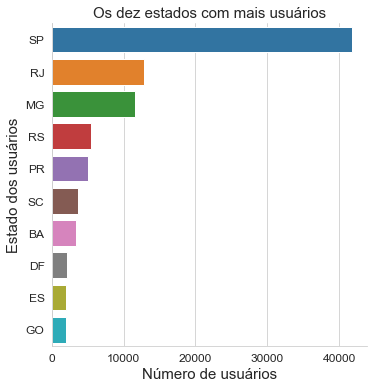

In [49]:
#Crio os dados
dados_CUST_CT = df_CUST_or.groupby(["customer_state"]
                                  ).count().sort_values(by="customer_city",ascending=False).head(10).copy()

fonte = {"size":15}
plt.figure(figsize=(10,8))
sns.catplot(data=dados_CUST_CT,y=dados_CUST_CT.index,x="customer_id", kind="bar")
plt.xlabel("Número de usuários", fontdict=fonte)
plt.ylabel("Estado dos usuários", fontdict=fonte)
plt.title("Os dez estados com mais usuários", fontdict=fonte)
plt.tick_params(labelsize=12)
plt.show()

del dados_CUST_CT

**Dados acerca dos vendedores**

<Figure size 720x576 with 0 Axes>

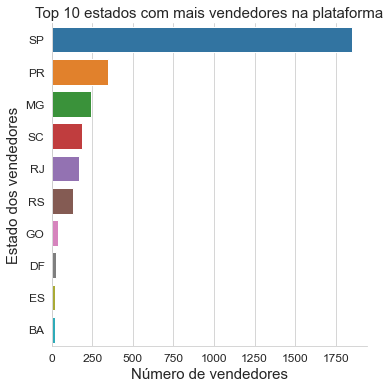

In [50]:
#Crio os dados
dados_Sell_SC = df_SELL_or.groupby(["seller_state"]
                                  ).count().sort_values(by="seller_id", ascending=False).head(10).copy()

fonte = {"size":15}
plt.figure(figsize=(10,8))
sns.catplot(data=dados_Sell_SC, y=dados_Sell_SC.index, x="seller_id", kind="bar")
plt.ylabel("Estado dos vendedores",fontdict=fonte)
plt.xlabel("Número de vendedores", fontdict=fonte)
plt.title("Top 10 estados com mais vendedores na plataforma", fontdict=fonte)
plt.tick_params(labelsize=12)
plt.show()

del dados_Sell_SC

**Dados acerca dos produtos**

*Os 10 tipos de produtos mais presentes na plataforma*

<Figure size 720x576 with 0 Axes>

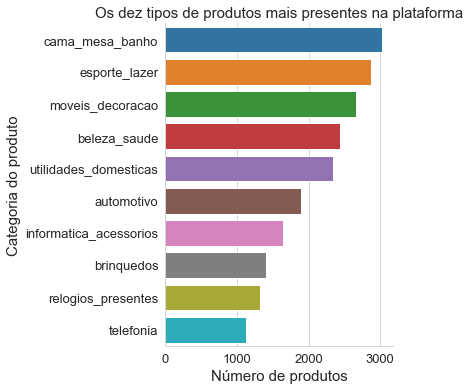

In [51]:
dados_PROD_PI = df_PROD_or.groupby(["product_category_name"]
                                ).count().sort_values(by="product_id",ascending=False).head(10).copy()
fonte = {"size":15}
plt.figure(figsize=(10,8))
sns.catplot(kind="bar", data = dados_PROD_PI, y=dados_PROD_PI.index, x="product_id")
plt.xlabel("Número de produtos",fontdict=fonte)
plt.ylabel("Categoria do produto",fontdict=fonte)
plt.title("Os dez tipos de produtos mais presentes na plataforma",fontdict=fonte)
plt.tick_params(labelsize=13)
plt.show()

del dados_PROD_PI

**Dados a respeito dos pedidos**

*Status dos pedidos*

<Figure size 720x576 with 0 Axes>

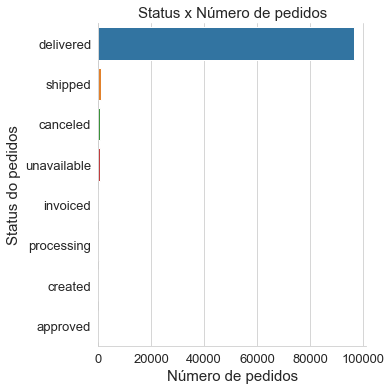

In [52]:
dados_Ord_CI = df_Ord_or.groupby(["order_status"]
                                ).count().sort_values(by="customer_id", ascending=False)
plt.figure(figsize=(10,8))
fonte={"size":15}
sns.catplot(kind="bar",data=dados_Ord_CI,y=dados_Ord_CI.index,x="customer_id")
plt.ylabel("Status do pedidos",fontdict=fonte)
plt.xlabel("Número de pedidos",fontdict=fonte)
plt.title("Status x Número de pedidos",fontdict=fonte)
plt.tick_params(labelsize=13)
plt.show()

del dados_Ord_CI

A esmagadora maioria dos produtos foram entregues.

*Histograma de fretes*

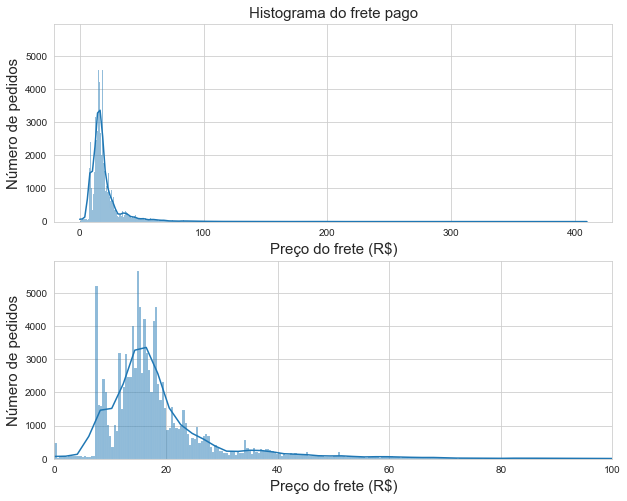

In [53]:
fig, axes = plt.subplots(2, figsize = (10,8))
fonte={"size":15}

sns.histplot(data=df_OrdI_or, x="freight_value", kde=True, bins=1000, ax = axes[0])
axes[0].set_ylabel("Número de pedidos", fontdict=fonte)
axes[0].set_xlabel("Preço do frete (R$)", fontdict=fonte)
axes[0].set_title("Histograma do frete pago", fontdict=fonte)

sns.histplot(data=df_OrdI_or, x="freight_value", kde=True, bins=1000, ax = axes[1])
axes[1].set_xlim((0,100))
axes[1].set_ylabel("Número de pedidos", fontdict=fonte)
axes[1].set_xlabel("Preço do frete (R$)", fontdict=fonte)
plt.show()

In [54]:
df_OrdI_or["freight_value"].describe()

count    112650.000000
mean         20.031952
std          16.017651
min           0.000000
25%          13.080000
50%          16.270000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

In [55]:
df_OrdI_or.query("freight_value>100").shape

(690, 7)

Podemos ver que a mediana dos gastos com frete gira em torno de R$16,00.

Além disso, dos  112650 pedidos, temos que 690 deles tem um frete maior do que R$100,00.

*Histograma de gastos*

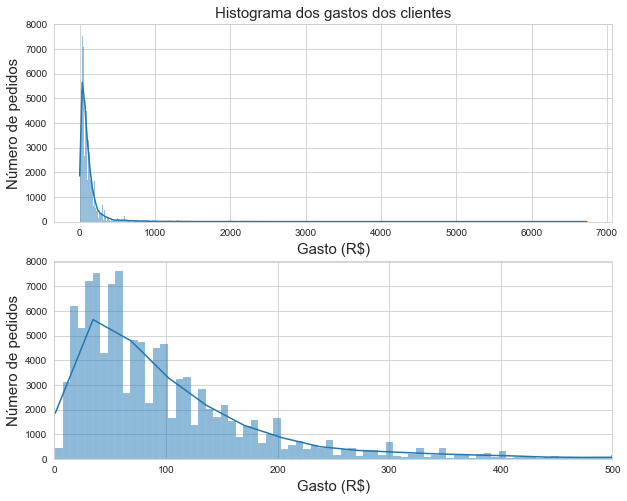

In [56]:
fig, axes = plt.subplots(2, figsize = (10,8))
fonte={"size":15}

sns.histplot(data=df_OrdI_or, x="price", kde=True, bins=1000, ax = axes[0])
axes[0].set_ylabel("Número de pedidos", fontdict=fonte)
axes[0].set_xlabel("Gasto (R$)", fontdict=fonte)
axes[0].set_title("Histograma dos gastos dos clientes", fontdict=fonte)

sns.histplot(data=df_OrdI_or, x="price", kde=True, bins=1000, ax = axes[1])
axes[1].set_xlim((0,500))
axes[1].set_ylabel("Número de pedidos", fontdict=fonte)
axes[1].set_xlabel("Gasto (R$)", fontdict=fonte)
plt.show()

In [57]:
df_OrdI_or["price"].describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [58]:
df_OrdI_or.query("price>500").shape

(3216, 7)

Podemos notar que a mediana dos gastos na plataforma gira em torno de R$183,60.

Além disso, temos alguns gastos extremamente elevados, com o mais alto sendo o de R$6735,00.

Dentre esses gastos elevados, 3216 pedidos apresentam valores maiores que R$500,00.

*Número de itens por compra*

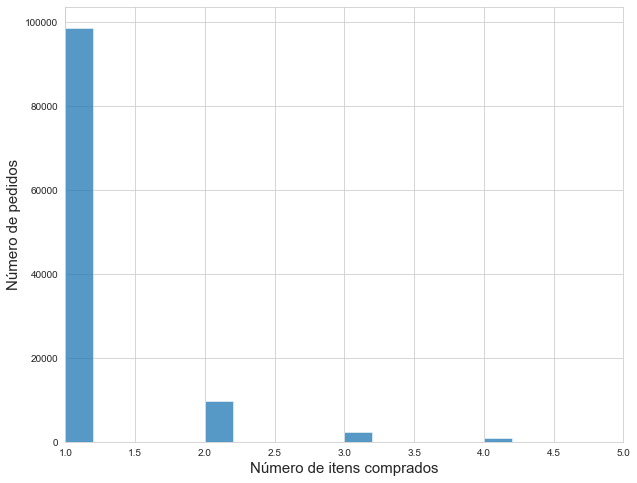

In [59]:
plt.figure(figsize=(10,8))
fonte={"size":15}

sns.histplot(data=df_OrdI_or, x="order_item_id", bins=100)
plt.xlim((1,5))
plt.ylabel("Número de pedidos", fontdict=fonte)
plt.xlabel("Número de itens comprados", fontdict=fonte)
plt.show()

In [124]:
df_OrdI_or.query("order_item_id >= 2").shape

(13984, 7)

Podemos notar que a maioria esmagadora dos pedidos envolvem a compra de um único item por vez. Dos 112650 dados que temos, um pouco mais de 12.4% (13984) envolve a compra de dois ou mais itens.

**Dados a respeito do pagamento**

*Histograma do número de prestações*

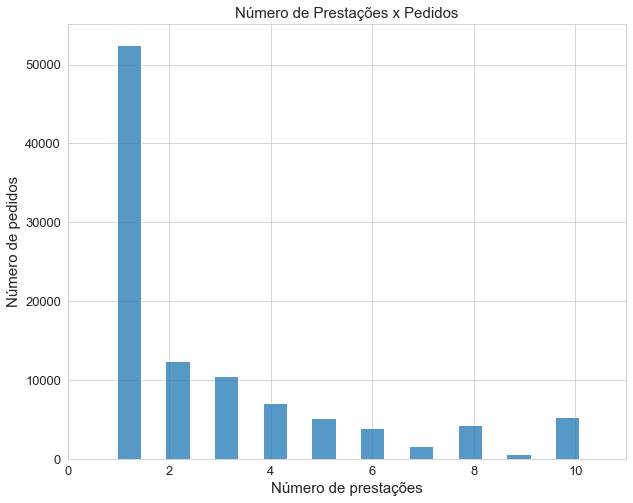

In [61]:
plt.figure(figsize=(10,8))
fonte={"size":15}

sns.histplot(data=df_OrdP_or, x="payment_installments", bins=50)
plt.xlim(0,11)
plt.xlabel("Número de prestações",fontdict=fonte)
plt.ylabel("Número de pedidos",fontdict=fonte)
plt.title("Número de Prestações x Pedidos",fontdict=fonte)
plt.tick_params(labelsize=13)
plt.show()

In [62]:
df_OrdP_or.query("payment_installments>11").shape

(318, 5)

A maioria dos clientes paga em uma única prestação com pouquíssimos precisando de 1 ano ou mais para o pagamento.

*Valor pago pelo cliente*

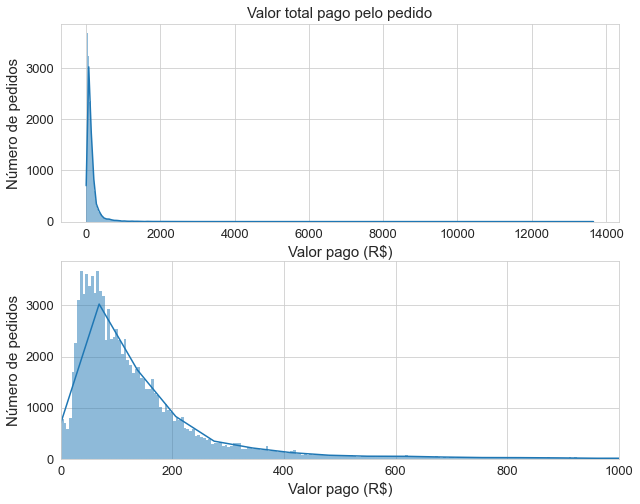

In [63]:
fig, axes = plt.subplots(2, figsize = (10,8))
fonte={"size":15}

sns.histplot(data=df_OrdP_or, x="payment_value", kde=True, ax = axes[0])
axes[0].set_xlabel("Valor pago (R$)",fontdict=fonte)
axes[0].set_ylabel("Número de pedidos",fontdict=fonte)
axes[0].set_title("Valor total pago pelo pedido",fontdict=fonte)
axes[0].tick_params(labelsize=13)

sns.histplot(data=df_OrdP_or, x="payment_value", kde=True, ax = axes[1])
axes[1].set_xlim((0,1000))
axes[1].set_xlabel("Valor pago (R$)",fontdict=fonte)
axes[1].set_ylabel("Número de pedidos",fontdict=fonte)
axes[1].tick_params(labelsize=13)
plt.show()

*Tipo de pagamento preferido*

<Figure size 720x576 with 0 Axes>

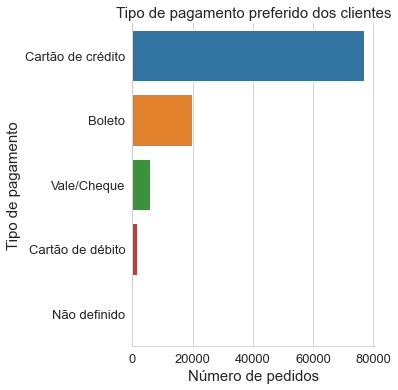

In [64]:
data_OrdP_PT = df_OrdP_or.groupby(["payment_type"]).count().sort_values(by="order_id",ascending=False)
data_OrdP_PT.index = ["Cartão de crédito", "Boleto", "Vale/Cheque", "Cartão de débito", "Não definido"]

plt.figure(figsize=(10,8))
fonte={"size":15}

sns.catplot(data=data_OrdP_PT,y=data_OrdP_PT.index,x="order_id", kind="bar")
plt.xlabel("Número de pedidos",fontdict=fonte)
plt.ylabel("Tipo de pagamento",fontdict=fonte)
plt.title("Tipo de pagamento preferido dos clientes",fontdict=fonte)
plt.tick_params(labelsize=13)
plt.show()

### 3.2 Visualizando dados de tabelas distintas

#### 3.2.1 Vendas mensais

Em uma primeira abordagem para a visualização de dados irei juntar **três** tabelas distintas:
* `df_Ord_or`: ["order_id","order_approved_at"]
* `df_OrdI_or`: ["order_id","product_id","order_item_id","price","freight_value"]
* `df_PROD_or`: ["product_id","product_category_name"]

Com essas três tabelas, espero poder responder as seguintes questões:

* Quais são os tipos mais populares de produtos por Ano/Mês?
* Qual o número de vendas por mês?
* Quanto dinheiro é gasto na plataforma mensalmente (excluindo frete e prestações)?

A primeira pergunta deve nos permitir responder a questão da existência, ou não, de sazonalidade na compra de produtos. Já a segunda, é uma ótima forma de vermos se a plataforma está crescendo conforme o tempo passa ou diminuindo (um KPI) e a terceira nos permitirá ter alguma ideia do fluxo de dinheiro que ocorre através da plataforma da OLIST.

In [65]:
#Faço a junção dos diferentes bancos de dados com os quais estou trabalhando:
dados_Prod_Pop = df_Ord_or[["order_id","order_approved_at"]].merge(right=
                 df_OrdI_or[["order_id","product_id","order_item_id","price","freight_value"]],
                 how="inner", on="order_id")
dados_Prod_Pop = dados_Prod_Pop.merge(right=df_PROD_or[["product_id","product_category_name"]]
                                     ,how="inner",on="product_id")

In [66]:
dados_Prod_Pop.head(1)

,order_id,order_approved_at,product_id,order_item_id,price,freight_value,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,87285b34884572647811a353c7ac498a,1,29.99,8.72,utilidades_domesticas


Nesse dataset temos:
* order_id; 
* order_approved_at;
* order_item_id;
* price;
* freight_value;
* product_id;
* product_category_name;

Nosso primeiro problema é trabalhar com a coluna order_approved_at. Essa é uma coluna que contém a data e o horário em que uma compra foi feita. Quero separá-la em duas novas colunas, uma contendo a data e outra o horário.

In [67]:
dados_Prod_Pop["order_approved_at"].isnull().sum()

15

Temos quinze valores nulos, como buscamos dados temporais, e comparado ao número de dados que temos, irei apenas retirá-los do dataset.

In [68]:
#Jogo os valores fora;
dados_Prod_Pop = dados_Prod_Pop[dados_Prod_Pop["order_approved_at"].notnull()] 
dados_Prod_Pop[["data","horario"]] = dados_Prod_Pop["order_approved_at"].str.split(" ",expand=True)

#As colunas data e horario são do tipo objeto. Devemos transformá-las em algo do tipo datetime, para isso usarei do pacote datetime.
dados_Prod_Pop["data_dtt"] = pd.to_datetime(dados_Prod_Pop["data"], format="%Y-%m-%d")

#Agora, retiro algumas colunas desnecessárias (a partir desse ponto) como: order_approved_at, horario.
dados_Prod_Pop.drop(columns=["order_approved_at","horario"], inplace=True, axis=1)

#Agora, abro a couna "data" em três diferentes colunas, Ano, Mês e Dia.
dados_Prod_Pop[["Ano","Mês","Dia"]] = dados_Prod_Pop["data"].str.split('-',expand=True)
dados_Prod_Pop["Ano_Mes"] = dados_Prod_Pop["Ano"]+"-"+dados_Prod_Pop["Mês"] #Crio uma coluna contendo Ano e Mês.

In [69]:
dados_Prod_Pop.head(1)

,order_id,product_id,order_item_id,price,freight_value,product_category_name,data,data_dtt,Ano,Mês,Dia,Ano_Mes
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,1,29.99,8.72,utilidades_domesticas,2017-10-02,2017-10-02,2017,10,02,2017-10


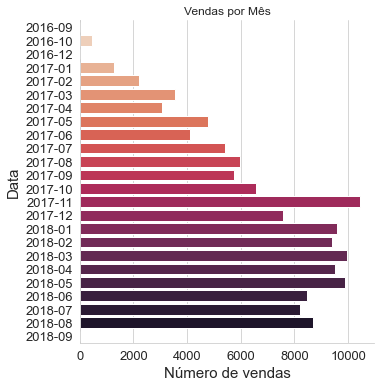

In [70]:
fonte = {"size":15}
axes = sns.catplot(data = dados_Prod_Pop.groupby(["Ano_Mes"]).sum(), kind="bar"
           ,x="order_item_id",y=dados_Prod_Pop.groupby(["Ano_Mes"]).sum().index, palette="rocket_r")
plt.ylabel("Data",fontdict=fonte)
plt.xlabel("Número de vendas", fontdict=fonte)
plt.title("Vendas por Mês")
plt.tick_params(labelsize=13)
#plt.xticks(rotation=45)
plt.show()

Como podemos ver, ocorreu um aumento constante no número de vendas pela plataforma, começando em Janeiro de 2017 e aparentemente estabilizando em torno de 8000 vendas um ano depois. Devido a quantidade de dados que temos disponíveis, não podemos ver se existe uma sazonalidade nas vendas totais conforme o tempo passa (precisaríamos de mais dados de anos anteriores). Portanto, para buscarmos a existência (ou não) de sazonalidade nos dados, devemos observar os itens mais vendidos por mês. Para isso, será útil usar a função a seguir:

In [123]:
def graficos(dataset,mes,paleta=None,fontsz={"size":15},labelsz=13,Ano=2017):
    '''
    Essa função permitirá criar um gráfico.
    '''
#Apenas para evitar repetição desnecessária de linhas.
    sns.catplot(data=dataset, y=dataset.index, x="order_item_id", kind="bar", palette=paleta)
    plt.xlabel("Número de vendas", fontdict=fontsz)
    plt.ylabel("Categoria dos produtos", fontdict=fontsz)
    plt.title("Tipo de produtos mais vendidos em %s"%(mes), fontdict=fonte)
    plt.tick_params(labelsize=labelsz)
    plt.savefig("Imagens\\%s_%s"%(Ano,mes),bbox_inches='tight')
    plt.show()
    
def criapaleta(lista):
    '''
    Essa função deve criar um dicionário em que cada elemento da entrada terá uma cor correspondente.
    '''
#Essa paleta foi feita da seguinte forma: obtive o top 10 de cada mês e via quais não estavam presentes na paleta, logo em seguida eu adicionava a mão.
#É possível fazer o mesmo de forma "automática" caso tivéssemos mais dados para a análise, contudo o tempo necessário para fazer esse novo código é,
#provavelmente, muito maior.
    superpaleta = {"cama_mesa_banho":"darkgreen", "esporte_lazer":"brown", "moveis_decoracao":"blue", "beleza_saude":"purple",
                  "informatica_acessorios":"pink", "brinquedos":"darkred", "utilidades_domesticas":"steelblue", "ferramentas_jardim":"red",
                  "relogios_presentes":"darkslategrey", "cool_stuff":"yellow", "automotivo":"gray", "telefonia":"seagreen",
                  "perfumaria":"lightcoral", "moveis_escritorio":"coral", "bebes":"orange", "market_place":"midnightblue",
                  "climatizacao":"goldenrod",  "papelaria":"olive", "eletronicos":"darkcyan"}
    dicio_retorno = {}
    for i in lista:
        dicio_retorno.update({i:superpaleta[i]})
    return dicio_retorno

**Dados de 2016**

<Figure size 720x576 with 0 Axes>

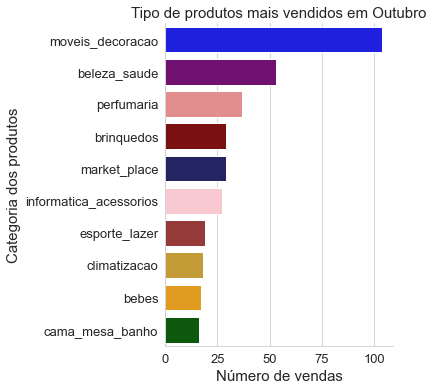

In [98]:
dados_Prod_Outubro = dados_Prod_Pop.query("Ano == '2016'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['10'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Outubro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Outubro,"Outubro", paleta=paleta_cor, Ano=2016)
del dados_Prod_Outubro

**Dados de 2017**

<Figure size 720x576 with 0 Axes>

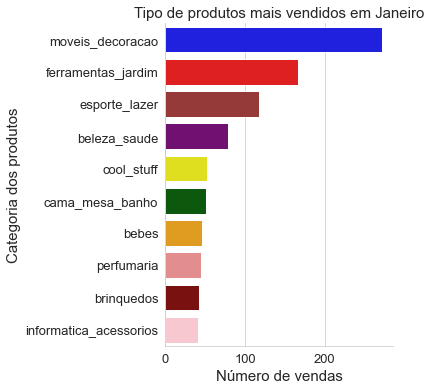

In [99]:
dados_Prod_Janeiro = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['01'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Janeiro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Janeiro,"Janeiro", paleta=paleta_cor)
del dados_Prod_Janeiro

<Figure size 720x576 with 0 Axes>

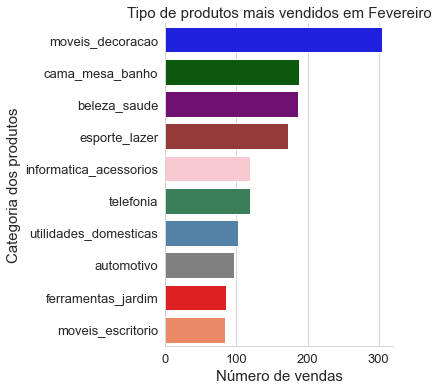

In [100]:
dados_Prod_Fevereiro = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['02'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Fevereiro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Fevereiro,"Fevereiro", paleta=paleta_cor)
del dados_Prod_Fevereiro

<Figure size 720x576 with 0 Axes>

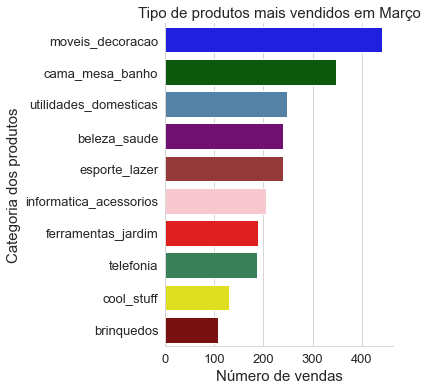

In [101]:
dados_Prod_Marco = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['03'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Marco.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Marco,"Março",paleta=paleta_cor)
del dados_Prod_Marco

<Figure size 720x576 with 0 Axes>

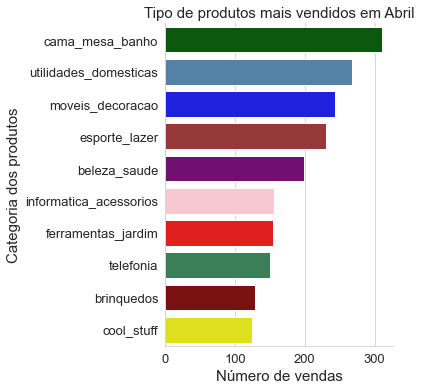

In [102]:
dados_Prod_Abril = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['04'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Abril.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Abril,"Abril", paleta=paleta_cor)
del dados_Prod_Abril

<Figure size 720x576 with 0 Axes>

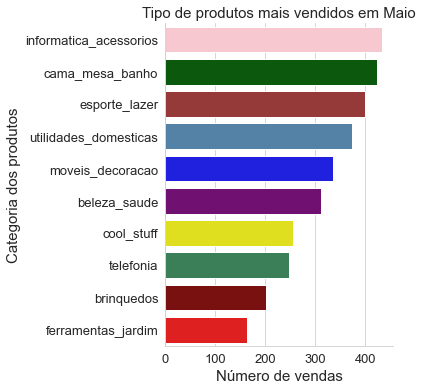

In [103]:
dados_Prod_Maio = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['05'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Maio.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Maio,"Maio", paleta=paleta_cor)
del dados_Prod_Maio

<Figure size 720x576 with 0 Axes>

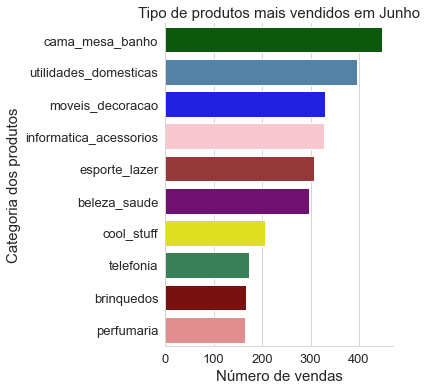

In [104]:
dados_Prod_Junho = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['06'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Junho.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Junho,"Junho", paleta=paleta_cor)
del dados_Prod_Junho

<Figure size 720x576 with 0 Axes>

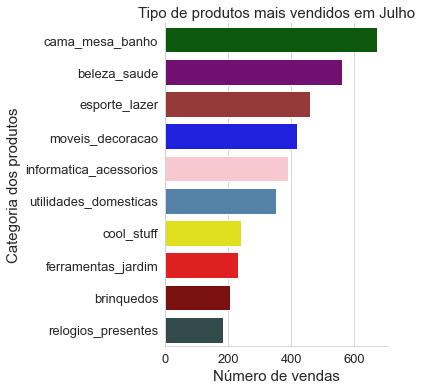

In [105]:
dados_Prod_Julho = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['07'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Julho.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Julho,"Julho", paleta=paleta_cor)
del dados_Prod_Julho

<Figure size 720x576 with 0 Axes>

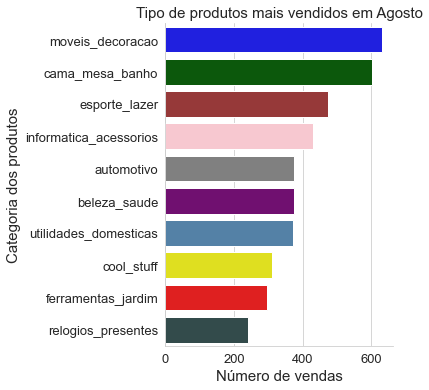

In [106]:
dados_Prod_Agosto = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['08'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Agosto.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Agosto,"Agosto", paleta=paleta_cor)
del dados_Prod_Agosto

<Figure size 720x576 with 0 Axes>

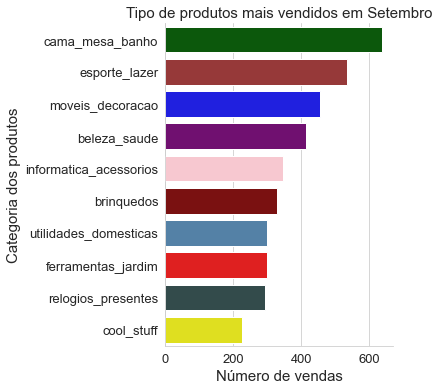

In [107]:
dados_Prod_Setembro = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['09'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Setembro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Setembro,"Setembro", paleta=paleta_cor)
#del dados_Prod_Setembro

<Figure size 720x576 with 0 Axes>

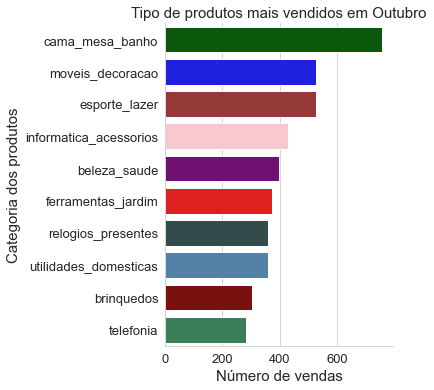

In [108]:
dados_Prod_Outubro = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['10'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Outubro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Outubro,"Outubro", paleta=paleta_cor)
del dados_Prod_Outubro

<Figure size 720x576 with 0 Axes>

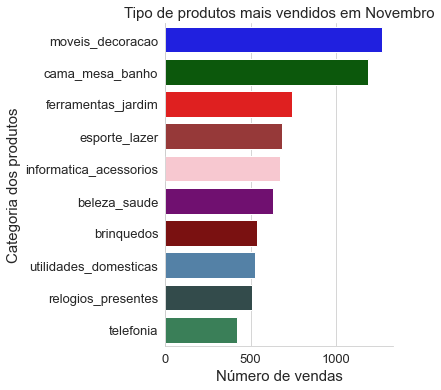

In [109]:
dados_Prod_Novembro = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['11'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Novembro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Novembro,"Novembro",paleta=paleta_cor)
del dados_Prod_Novembro

<Figure size 720x576 with 0 Axes>

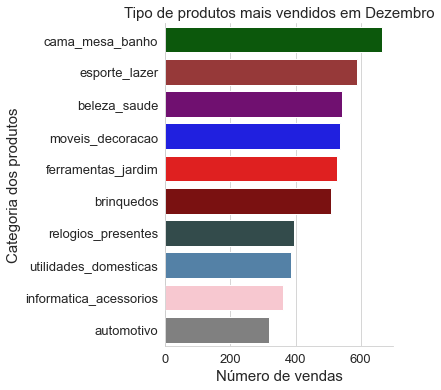

In [110]:
dados_Prod_Dezembro = dados_Prod_Pop.query("Ano == '2017'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['12'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Dezembro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Dezembro,"Dezembro",paleta=paleta_cor)
del dados_Prod_Dezembro

**Dados 2018**

<Figure size 720x576 with 0 Axes>

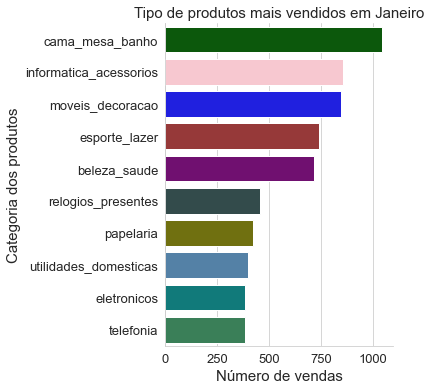

In [113]:
dados_Prod_Janeiro = dados_Prod_Pop.query("Ano == '2018'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['01'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Janeiro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Janeiro,"Janeiro", paleta=paleta_cor, Ano=2018)
del dados_Prod_Janeiro

<Figure size 720x576 with 0 Axes>

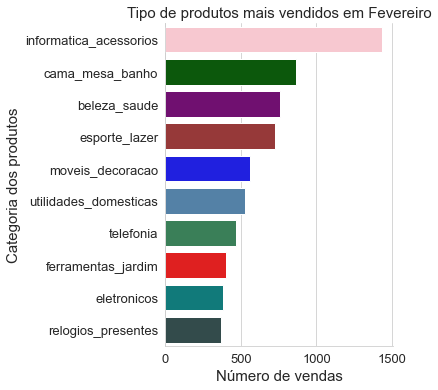

In [115]:
dados_Prod_Fevereiro = dados_Prod_Pop.query("Ano == '2018'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['02'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Fevereiro.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Fevereiro,"Fevereiro", paleta=paleta_cor, Ano=2018)
del dados_Prod_Fevereiro

<Figure size 720x576 with 0 Axes>

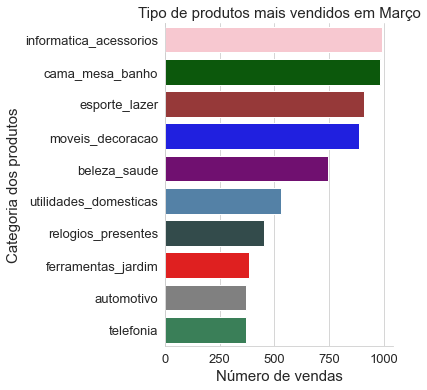

In [117]:
dados_Prod_Marco = dados_Prod_Pop.query("Ano == '2018'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['03'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Marco.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Marco,"Março", paleta=paleta_cor, Ano=2018)
del dados_Prod_Marco

<Figure size 720x576 with 0 Axes>

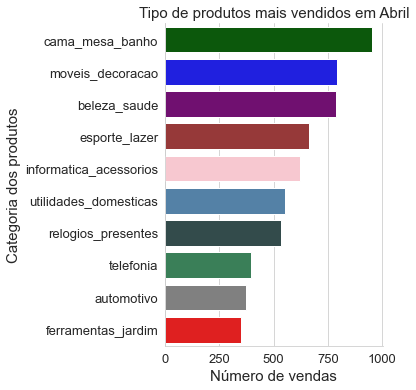

In [118]:
dados_Prod_Abril = dados_Prod_Pop.query("Ano == '2018'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['04'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Abril.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Abril,"Abril", paleta=paleta_cor, Ano=2018)
del dados_Prod_Abril

<Figure size 720x576 with 0 Axes>

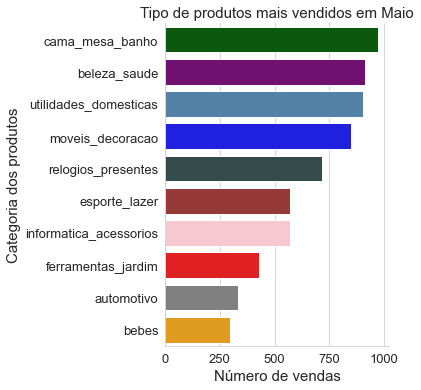

In [119]:
dados_Prod_Maio = dados_Prod_Pop.query("Ano == '2018'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['05'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Maio.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Maio,"Maio", paleta=paleta_cor, Ano=2018)
del dados_Prod_Maio

<Figure size 720x576 with 0 Axes>

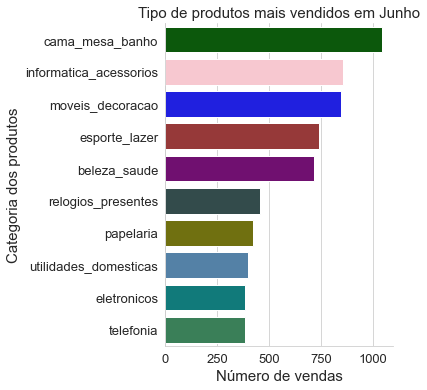

In [120]:
dados_Prod_Junho = dados_Prod_Pop.query("Ano == '2018'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['01'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Junho.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Junho,"Junho", paleta=paleta_cor, Ano=2018)
del dados_Prod_Junho

<Figure size 720x576 with 0 Axes>

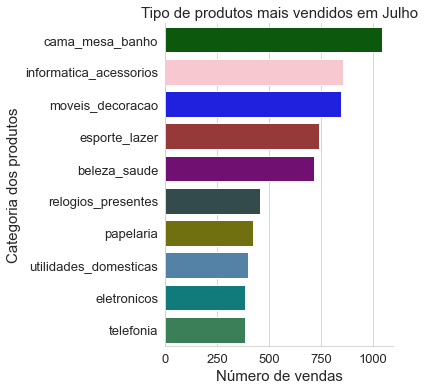

In [121]:
dados_Prod_Julho = dados_Prod_Pop.query("Ano == '2018'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['01'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Julho.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Julho,"Julho", paleta=paleta_cor, Ano=2018)
del dados_Prod_Julho

<Figure size 720x576 with 0 Axes>

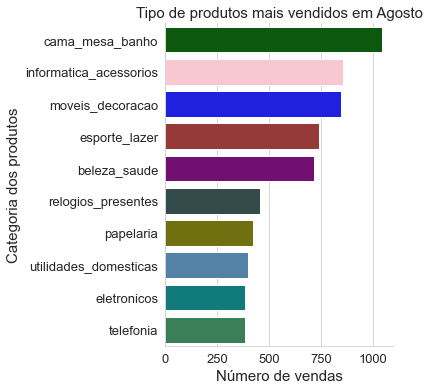

In [122]:
dados_Prod_Agosto = dados_Prod_Pop.query("Ano == '2018'").groupby(["Mês","product_category_name"]
                                             ).sum().sort_values(by=["Mês", "order_item_id"], ascending=False
                                                                ).loc['01'].head(10).copy()

paleta_cor = criapaleta(dados_Prod_Agosto.index)
plt.figure(figsize=(10,8))
fonte = {"size":15}
graficos(dados_Prod_Agosto,"Agosto", paleta=paleta_cor, Ano=2018)
del dados_Prod_Agosto

Uma visualização lado a lado de todos esses resultados pode ser encontrado no arquivo `Visualização_Olist.ipynb`. Acabei não fazendo neste pois iria poluir esse notebook com muitas imagens repetidas. Enfim, após analisar os resultados obtidos concluí-se que:

Alguns tipos de produtos são comprados de forma consistente na plataforma:
* Móveis e decoração;
* Cama, mesa e banho;
* Esporte e lazer;
* Acessórios de informática;
* Beleza e saúde;
* Utilidades Domésticas.

Outros tipos de produtos aparecem de forma recorrente mas não são coisas que vemos todos os meses:
* Ferramentas de Jardinagem;
* Relógios/Presentes;
* Telefonia.

Por fim, existem alguns produtos que apareceram em algum ano de forma relativamente recorrente, mas não apareceram no outro (claro, com os dados em mãos não foi possível ver uma repetição).

**2017**
* Brinquedos;
* cool_stuff;

**2018**
* Eletrônicos;
* Papelaria.

Para eletrônicos, papelaria e cool_stuff, esses podem talvez serem produtos que apareceram devido a alguma alteração na plataforma. Já o a parte de brinquedos não tenho muita explicação a respeito do porquê dele ter parado. 

Além disso, não foi possível observar nenhum tipo de sazonalidade em relação aos produtos. Contudo, eventos externos (como o aumento de compra de brinquedos no Natal em Dezembro) possa levar a um certo fenômeno semelhante a sazonalidade, porém com dados de apenas um três anos, sendo um completo e dois incompletos, não me permitiram observá-los. 

## Conclusões

* **Os produtos vendidos são sazonais?** De acordo com os dados obtidos na seção de visualização de dados, mais específicamente dados de vendas por mês, não foi possível observar nenhuma sazonalidade nos resultados. O que foi possível observar é a existência de tipos de produtos que são vendidos mensalmente de maneira estável. Esses tipos são:
    - Móveis e decoração;
    - Cama, Mesa e banho;
    - Esporte e lazer;
    - Acessórios de informática;
    - Beleza e saúde;
    - Utilidades Domésticas.